Here we're going to do another exercise with the **frog** and the **pond**. This time we want to make the frog hop around and find **flies**.

We need to install some software specific to our pondworld.

In [ ]:
%pip install git+https://github.com/eilene-ftf/pondworld.git

  Cloning https://github.com/eilene-ftf/pondworld.git to /tmp/pip-req-build-0ngoexjy
  Running command git clone --filter=blob:none --quiet https://github.com/eilene-ftf/pondworld.git /tmp/pip-req-build-0ngoexjy
  Resolved https://github.com/eilene-ftf/pondworld.git to commit 7aa712ff4d7ad0034d2e95090831542552845893
  Preparing metadata (setup.py) ... done


We need to install Python ACT-R.

In [ ]:
%pip install python_actr

Next we need to import all of those libraries we just installed.

In [ ]:
import gymnasium as gym
from minigrid.minigrid_env import MiniGridEnv

import pondworld
from pondworld import FrogControl, EnvState

from python_actr import Model, ACTR, Buffer, log_everything

from IPython.display import clear_output

import time

### The Pond

As before, we'll create `Pond` as an empty ACT-R `Model`. This time, however, things will be happening in the environment. We are just handling the environment through the GitHub PondWorld library imported above.

`Model`s are the organizing machinery of Python ACT-R, to the extent that even ACT-R objects are a *kind* of `Model`. We're creating `Pond` to enclose information about our frog's body and environment, so that the frog can interact with it. Other kinds of `Model`s, like `Memory`, afford ACT-R agents new cognitive capacities.

ACT-R thinks of the mind as a **system of modular parts**, managed by a central **production system**, that communicates by exchanging information through **buffers**.

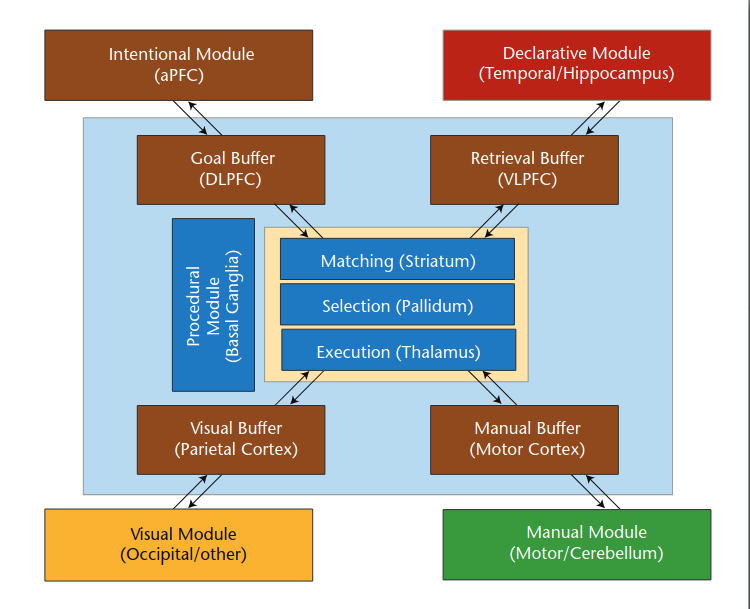

Above all, ACT-R is a **system for organizing cognitive models into agents**. Distinct models of memory, motor control, perception, and more can be "slotted in" to make a complete artificial intelligent agent, capable of complex behaviour, including, but not limited to, mimicking the behaviours of individual subjects in laboratory tasks.

In [ ]:
class Pond(Model):
    pass

This is where the magic happens. This is our frog's brain. Right now, it's fairly empty. **Let's give the frog some production rules to help it find flies to eat.**

**MODIFY THE FOLLOWING CODE BY PASTING IN PRODUCTIONS FROM BELOW**

In [ ]:
# create our frog's brain
class FrogMind(ACTR):
    # give our frog a buffer that holds information
    # let's call this buffer "vision". it represents what the frog is seeing.
    vision=Buffer()

    # here we're going to set what the frog is seeing right at the moment
    # initially we don't know what the frog is looking at
    vision.set('unknown')

    # a set of slot names, corresponding to the three items the frog might see
    # and a set of values, corresponding to what states those items might be in
    slots = ["fly", "key", "door"]
    values = ["nowhere", "here", "ahead", "left", "right", "held"]

    # also, we're keeping track of all the things the frog can do
    # you never know when you might need them
    actions = ["forward", "left", "right", "interact", "pickup"]

    # let's make another buffer for the frog's hunger
    appetite=Buffer()
    appetite.set('hungry')

    # look to see if there's any flies
    def look(vision='unknown'):
        self.wait(0.3) # adds a rest between steps so we can see what's going on
        self.parent.clear() # makes sure only the most recent output is shown
        observation = self.parent.frog_body.look()  # now, when it looks,
                                                    # the frog will get a
                                                    # collection of several
                                                    # items

        # This creates a list of 'slot:value' pairs, using what's
        # contained in observation
        new_memory = []
        for slot in slots:
            val_index = observation[slot]   # gets a number indicating the state
                                            # of the object called 'slot'
            value = values[val_index]       # then looks it up
            new_memory.append(f'{slot}:{value}') # and adds it to

        updated = ' '.join(new_memory)  # make the contents of new_memory into a
                                        # string ACT-R can understand
        print("The frog sees:", updated)# prints contents of vision buffer
        vision.set(updated) # update vision with what the frog sees

    # production rule for when the frog is full
    def stop_production(appetite='full'):
        print("Frog is full and content. Frog shuts its eyes to take a nap.")
        self.stop() # end the simulation

    # PUT YOUR FROG BRAIN PRODUCTIONS BELOW THIS LINE!

Below are some production rules you can copy and paste into your frog's brain above in order to make your frog do things. Make sure any production rules you copy and paste are properly idented.

In ACT-R, all production rules have three parts as follows:

```python
    def NAME(ANTECEDENT):
        CONSEQUENT
```

Each production needs a **unique** NAME. However, the ANTECEDENT does not have to be unique. Multiple productions can have the same ANTECEDENT and ACT-R will **select randomly** from among the productions that have the same ANTECEDENT when choosing which production fires. Each production also has an CONSEQUENT which is what action occurs when the production fires.

For our frog, each production rule will have an ANTECEDENT of `vision="SOMETHING"`. The SOMETHING is a `slot:value` pair describing what the frog sees. Change the `"SOMETHING"` to one of the following to program your frog's brain:

1.   `"fly:nowhere"`   (no flies in sight, but maybe flies elsewhere)
2.   `"fly:here"`      (there's a fly right in front of the frog)
3.   `"fly:ahead"`     (there's a fly somewhere ahead, but not in tongue range)
4.   `"fly:left"`      (there's a fly somewhere to the left)
5.   `"fly:right"`     (there's a fly somewhere to the right)
6.   `"unknown"`       (the frog hasn't looked around to see anything yet)

And here are some example production rules!
*   You don't have to use all of them for your frog
*   You can use all of them if you want
*   You may need **more than one** copy of some of the productions (e.g., if there are two different situations where you want to turn left) but make sure each one has a **unique** NAME (e.g., if you make two `turn_left` productions, call one of them something else like `def explore_left(vision="SOMETHING"):`

```python
    def eat_fly(vision='SOMETHING'):
        print("The frog spits out its tongue and snaps up the fly.")
        result = self.parent.frog_body.move("interact")
        if result.terminated: # if the frog has eaten all of the flies
            appetite.set('full') # the frog has satisfied its hunger
        vision.set('unknown')
```

```python        
    def turn_left(vision="SOMETHING"):
        print("The frog turns left.")
        self.parent.frog_body.move("left")
        vision.set('unknown')
```

```python
    def turn_right(vision="SOMETHING"):
        print("The frog turns right.")
        self.parent.frog_body.move("right")
        vision.set('unknown')
```

```python        
    def hop_forward(vision="SOMETHING"):
        print("The frog hops forward.")
        self.parent.frog_body.move("forward")
        vision.set('unknown')
```




---



This creates the pond environment. We made a nice picture of it but it's not working correctly right now so we're going to display it using ASCII characters as the frog is moving around.

In [ ]:
# Sets up the frog's virtual world
env = gym.make("pond-v0", tile_size=32, render_mode='rgb_array')
# Gives the frog a body in it
frog_body = FrogControl(env, textmode=True, emojis=True)
# Gets things going!
frog_body.start()

Finally this is the code we need to run in order to get our fly to hop around and eat flies. Press Play/Run here to get your frog to do stuff!

In [ ]:
kermit = FrogMind()                       # name the agent
kermit.wait = time.sleep
paradise_swamp = Pond()                   # name the environment
paradise_swamp.clear = lambda: clear_output(wait=True)
paradise_swamp.frog_body = frog_body      # put the frog's body in the environment
paradise_swamp.agent = kermit             # put the frog's brain in the environment
paradise_swamp.run()                      # Annnnd action!

🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱    
🧱⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛🪰⬛⬛⬛🧱    
🧱⬛⬛⬛⬛⬛🪰⬛⬛⬛⬛⬛⬛⬛⬛🧱    
🧱⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛🧱    
🧱⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛🪰⬛🧱    
🧱⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛🧱    
🧱⬛⬛⬛⬛🟨🟨🟨🟨🟨🟨🟨⬛⬛⬛🧱    
🧱⬛⬛⬛⬛🟨🟨🟨🟨🟨🟨🟨🪰⬛⬛🧱    
🧱⬛⬛⬛⬛🟨🟨🟨🟨🟨🟨🟨⬛🪰⬛🧱    live frog reaction:
🧱⬛⬛⬛🪰🟨🟨🟨🟨🟨🟨🐸⬛⬛⬛🧱    🟨🟨🟨🟨🟨🟨🟨
🧱⬛⬛⬛⬛🟨🟨🟨🟨🟨🟨🟨⬛⬛⬛🧱    🟨🟨🟨🟨🟨🟨🟨
🧱⬛⬛⬛⬛🟨🟨🟨🟨🟨🟨🟨⬛⬛⬛🧱    🟨🟨🟨🟨🟨🟨🟨
🧱⬛⬛⬛⬛🟨🟨🟨🟨🟨🟨🟨⬛⬛⬛🧱    🟨🟨🟨🟨🟨🟨🟨
🧱⬛⬛🪰⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛🧱    🟨🟨🟨🟨🟨🟨🟨
🧱⬛⬛⬛⬛⬛⬛⬛⬛⬛🪰⬛⬛⬛⬛🧱    🟨🟨🟨🟨🟨🟨🟨
🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱🧱    🟨🟨🟨🐸🟨🟨🟨
eat all the flies
frog compass: ⬅️
